In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl,np,pd,sklearn,tf,keras:
    print(model.__name__,model.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
matplotlib 3.0.2
numpy 1.16.1
pandas 0.23.4
sklearn 0.21.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# get the train_dataset and test_dataset
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
# split the train_dataset into train_set and valid_set ,to improve the believable the model evalute
x_train,x_valid = train_data[5000:],train_data[:5000]
y_train,y_valid = train_labels[5000:],train_labels[:5000]

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
test_data_scaled = scaler.transform(test_data.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
print(np.max(x_train),np.min(x_train))
print(np.max(x_train_scaled),np.min(x_train_scaled))

255 0
2.0231433 -0.8105136


In [5]:
input_shape = (28,28)

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=input_shape))
# model.add(tf.keras.layers.Dense(units=300,activation="relu"))
# model.add(tf.keras.layers.Dense(units=100,activation="relu"))
# model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=300,activation="relu"),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=10,activation="softmax")
])

#relu: y = max(0,x)
#softmax: convert into the prob_dis vec,cs 221n

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [6]:
history = model.fit(x_train,y_train,epochs=10,
         validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 49us/sample - loss: 2.6642 - accuracy: 0.6989 - val_loss: 0.7312 - val_accuracy: 0.7638
Epoch 2/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.6518 - accuracy: 0.7637 - val_loss: 0.6353 - val_accuracy: 0.7790
Epoch 3/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.5737 - accuracy: 0.7824 - val_loss: 0.6103 - val_accuracy: 0.7900
Epoch 4/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.5291 - accuracy: 0.7992 - val_loss: 0.5728 - val_accuracy: 0.8004
Epoch 5/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4940 - accuracy: 0.8143 - val_loss: 0.5519 - val_accuracy: 0.8136
Epoch 6/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4546 - accuracy: 0.8300 - val_loss: 0.5156 - val_accuracy: 0.8258
Epoch 7/10
55000/55000 [==============================] -

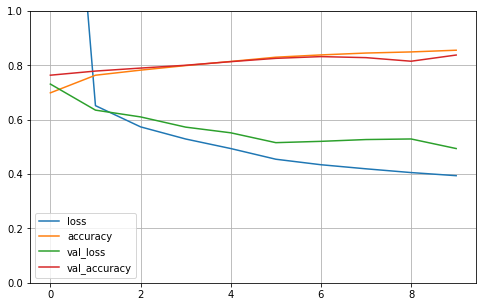

In [7]:
def plot_learning_curces(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curces(history)

In [8]:
model.evaluate(test_data_scaled,test_labels)

10000/10000 [==============================] - 0s 26us/sample - loss: 1.7725 - accuracy: 0.4145


[1.7724916309356689, 0.4145]